# Sarcastic News Recognition with NLP


### 1. Dataset

Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.

To overcome the limitations related to noise in Twitter datasets, this News Headlines dataset for Sarcasm Detection is collected from two news website. TheOnion aims at producing sarcastic versions of current events and we collected all the headlines from News in Brief and News in Photos categories (which are sarcastic). We collect real (and non-sarcastic) news headlines from HuffPost.

This new dataset has following advantages over the existing Twitter datasets:

Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embeddings.

Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets.

Unlike tweets which are replies to other tweets, the news headlines we obtained are self-contained. This would help us in teasing apart the real sarcastic elements.

Content
Each record consists of three attributes:

`is_sarcastic`: 1 if the record is sarcastic otherwise 0

`headline`: the headline of the news article

`article_link`: link to the original news article. Useful in collecting supplementary data


### 2. Data Load

In [8]:
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

# Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/tomtom/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tomtom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
dataset = pd.read_json('Sarcasm_Headlines_Dataset.json', lines= True) #the line hyperparametr allow us t convert non structured to structured data
dataset.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


¿Qué forma tiene el dataset?¿Cuántas instancias?¿Cuáles son sus columnas?¿Cuántos titulares hay de cada tipo?¿Podemos hablar ya de *features*?

In [10]:
dataset.shape

(26709, 3)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


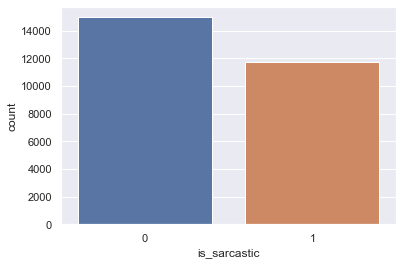

In [11]:
# see if the target variable is balanced or not
sns.countplot(dataset.is_sarcastic)
plt.show()

In [12]:
dataset[dataset.is_sarcastic==1].count()/dataset.shape[0]

article_link    0.438953
headline        0.438953
is_sarcastic    0.438953
dtype: float64

In [13]:
dataset[dataset.is_sarcastic==0].count()/dataset.shape[0]

article_link    0.561047
headline        0.561047
is_sarcastic    0.561047
dtype: float64

### 3. Entire dataset preprocesing


In [17]:
index_random = np.random.randint(0,high = dataset.shape[0])
titular = dataset.iloc[index_random].headline

#### 3.1 Tokenize

`sent_tokenize`

In [19]:
titular_st = nltk.tokenize.sent_tokenize(titular)
titular_st

['teens throwing rocks at overgrown, long-vacant supreme court seat']

`word_tokenize`

In [20]:
titular_wt = nltk.tokenize.word_tokenize(titular)
titular_wt

['teens',
 'throwing',
 'rocks',
 'at',
 'overgrown',
 ',',
 'long-vacant',
 'supreme',
 'court',
 'seat']

#### 3.2 Normalization

`Stopwords`

In [86]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]

`Delete stopwords`

In [88]:
titular_wt_sin_sw = [word for word in titular_wt if word not in stopwords]

In [23]:
freq = nltk.FreqDist(titular_wt_sin_sw)
freq

FreqDist({'teens': 1, 'throwing': 1, 'rocks': 1, 'overgrown': 1, ',': 1, 'long-vacant': 1, 'supreme': 1, 'court': 1, 'seat': 1})

#### 3.3 Filtering the dataset

In [24]:
filtrar = []
if True:
    filtrar.append("u")
    filtrar.append("new")

`3.3.1 Non Sarcastic dataset`

In [25]:
# I filter all the non sarcastic instances
dataset_no_sarcasmo = dataset[dataset.is_sarcastic==0]
dataset_no_sarcasmo.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0


In [89]:
# create a list of lists with all the headlines tokenized
todos_titulares_no_sarcasmo = []
for i in range(dataset_no_sarcasmo.shape[0]):
    titular = dataset_no_sarcasmo.iloc[i].headline
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]
    todos_titulares_no_sarcasmo.append(titular)

In [90]:
# return only one list with the headlines tokens
todos_titulares_no_sarcasmo = list(itertools.chain(*todos_titulares_no_sarcasmo))
#todos_titulares_no_sarcasmo[0:10]

In [28]:
# dictionary with frequency per word
freq_no_sarcasmo = nltk.FreqDist(todos_titulares_no_sarcasmo)
freq_no_sarcasmo

FreqDist({'trump': 1446, 'donald': 458, 'not': 387, 'says': 349, 'women': 317, 'one': 268, 'year': 244, 'first': 242, 'world': 241, 'man': 241, ...})

In [31]:
# df with non sarcastic words
df_no_sarcasmo = pd.DataFrame(list(freq_no_sarcasmo.items()), columns = ["Word","Frequency"])
df_no_sarcasmo.head()

,Word,Frequency
0,former,82
1,versace,1
2,store,14
3,clerk,5
4,sues,15


In [30]:
# df with non sarcastic words ordered by frequecy
df_no_sarcasmo.sort_values('Frequency',ascending=False, inplace = True)
df_no_sarcasmo.head()

,Word,Frequency
46,trump,1446
229,donald,458
498,not,387
421,says,349
29,women,317


In [32]:
# df with non sarcastic words ordered by frequecy with reseted index
df_no_sarcasmo.reset_index(drop = True, inplace=True)
df_no_sarcasmo.head()

,Word,Frequency
0,former,82
1,versace,1
2,store,14
3,clerk,5
4,sues,15


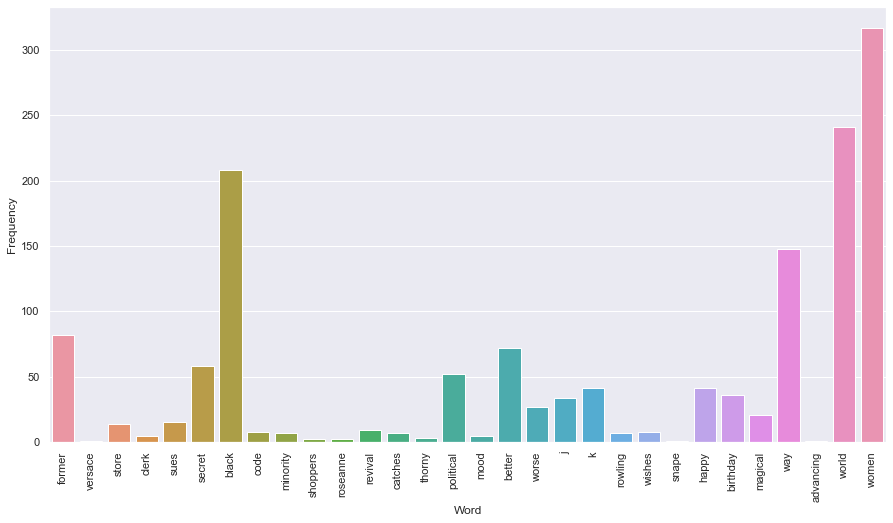

In [33]:
# plotting df with non sarcastic words ordered by frequecy
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_no_sarcasmo.iloc[:30].Word, y = df_no_sarcasmo.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

`3.3.2 Sarcastic dataset`

In [34]:
dataset_sarcasmo = dataset[dataset.is_sarcastic==1]
dataset_sarcasmo.head()

,article_link,headline,is_sarcastic
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
15,https://entertainment.theonion.com/nuclear-bom...,nuclear bomb detonates during rehearsal for 's...,1
16,https://www.theonion.com/cosby-lawyer-asks-why...,cosby lawyer asks why accusers didn't come for...,1


In [41]:
# tokenizig and cleaning sarcastic headlines
todos_titulares_sarcasmo = []
for i in range(dataset_sarcasmo.shape[0]):
    titular = dataset_sarcasmo.iloc[i].headline
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filtrar]
    todos_titulares_sarcasmo.append(titular)

In [91]:
# create one list with all the tokenized and cleaned words
todos_titulares_sarcasmo = list(itertools.chain(*todos_titulares_sarcasmo))
#todos_titulares_sarcasmo[0:10]

In [43]:
# dictionary with the word frequencies 
freq_sarcasmo = nltk.FreqDist(todos_titulares_sarcasmo)
freq_sarcasmo

FreqDist({'man': 1154, 'area': 480, 'report': 426, 'not': 352, 'nation': 339, 'woman': 319, 'year': 308, 'one': 273, 'old': 267, 'time': 252, ...})

In [44]:
# dataset with the word frequency
df_sarcasmo = pd.DataFrame(list(freq_sarcasmo.items()), columns = ["Word","Frequency"])
df_sarcasmo.head()

,Word,Frequency
0,mom,117
1,starting,32
2,fear,16
3,son,71
4,web,7


In [48]:
# dataset with the word frequency ordered by frequency
df_sarcasmo.sort_values('Frequency',ascending=False, inplace = True)
df_sarcasmo.head()

,Word,Frequency
0,man,1154
1,area,480
2,report,426
3,not,352
4,nation,339


In [49]:
# dataset with the word frequency with index reseted
df_sarcasmo.reset_index(drop = True, inplace=True)
df_sarcasmo.head()

,Word,Frequency
0,man,1154
1,area,480
2,report,426
3,not,352
4,nation,339


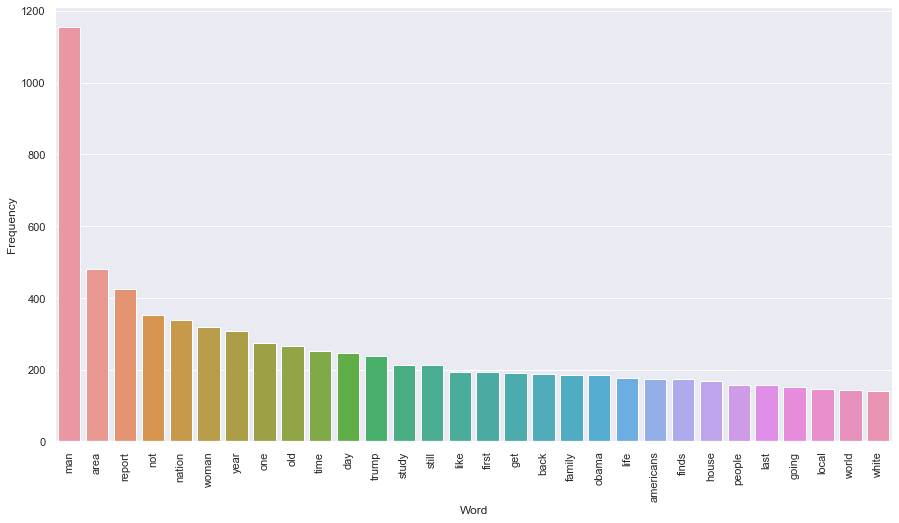

In [51]:
# plotting dataset with the word frequency with index reseted
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_sarcasmo.iloc[:30].Word, y = df_sarcasmo.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

#### 3.4 Lemmatization

In [52]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [53]:
# We import this library that allows us to replace characters
import re

# We import the NLTK lemmatize, and create the object
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [60]:
# I define a function to translate these tags to the POS values that 'wordnet_lemmatizer' understands.
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [62]:
# Applying lemmatization to the entire dataset

# We import the NLTK lemmatize, and create the object
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# We import this library that allows us to replace characters
import re

dataset = pd.read_json('Sarcasm_Headlines_Dataset.json', lines= True)
dataset = pd.concat([dataset.headline,dataset.is_sarcastic],axis=1)
dataset.dropna(axis=0,inplace=True)

# We bring back the stopwords
stopwords = nltk.corpus.stopwords.words('english')
#stopword.remove('no')
#stopword.remove('not')

In [63]:
titular_list=[]
for titular in dataset.headline:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras
    titular=nltk.word_tokenize(titular)
    
    # We apply the Lemmatizer 
    frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in titular]
    
    
   # We remove the words d emenos of 3 letters
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]
    
    # Finally we rejoin the headline
    titular=" ".join(titular)
    #dataset["titular_normalizado"] = titular_list
    titular_list.append(titular)

In [64]:
dataset["titular_lemm"] = titular_list
dataset.tail()

,headline,is_sarcastic,titular_lemm
26704,american politics in moral free-fall,0,american politics moral free fall
26705,america's best 20 hikes,0,america best hikes
26706,reparations and obama,0,reparations obama
26707,israeli ban targeting boycott supporters raise...,0,israeli targeting boycott supporters raises al...
26708,gourmet gifts for the foodie 2014,0,gourmet gifts foodie


In [65]:
# I create a new datasate called 'dataset_lem' that has only the columns 'titular_lemm' and 'is_sarcastic'.
dataset_lemm = pd.concat([dataset.titular_lemm,dataset.is_sarcastic],axis=1)
dataset_lemm.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
dataset_lemm.head()

,titular_lemm,is_sarcastic
0,former versace store clerk sues secret black c...,0
1,roseanne revival catches thorny political mood...,0
2,starting fear series closest thing grandchild,1
3,boehner wants wife listen come alternative deb...,1
4,rowling wishes snape happy birthday magical,0


#### 3.4 Vectorization

I will take the list of words and the vector that tells us whether or not the title is sarcastic

In [72]:
# I will take the list of words and the vector that tells us whether or not the title is sarcastic

list_titulos = list(dataset_lemm['titular_lemm'].values)
is_sarc = dataset_lemm['is_sarcastic'].values
is_sarc

array([0, 0, 1, ..., 0, 0, 0])

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

# I will use only the 1000 words most frequently in the entire corpus to generate the vectors
max_features=1000
cou_vec=CountVectorizer(max_features=max_features, ngram_range=(1, 2))  #stop_words="english" 

In [74]:
matriz_titulos = cou_vec.fit_transform(list_titulos)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abortion', 'abuse', 'accidentally', 'according', 'accused', 'across', 'action', 'activists', 'actor', 'actually', 'address', 'adds', 'administration', 'admits', 'adorable', 'advice', 'afghanistan', 'ahead', 'airport', 'album', 'allegations', 'almost', 'already', 'also', 'always', 'amazing', 'amazon', 'america', 'american', 'americans', 'amid', 'among', 'anniversary', 'announce', 'announces', 'another', 'anti', 'anyone', 'anything', 'apartment', 'apologizes', 'apparently', 'apple', 'area', 'area woman', 'around', 'arrested', 'artist', 'asking', 'asks']


### 4. Benchmark Modeling

In [75]:
x = matriz_titulos.toarray()
y = is_sarc

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["No Sarcastico","Sarcastico"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

#### 4.1 Naive Bayes


In [78]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.6641707225758143


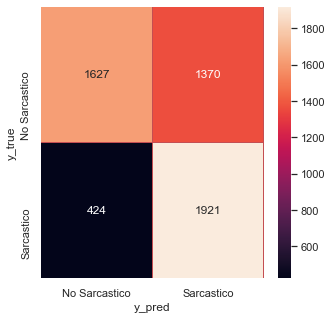

In [79]:
y_pred=nb.predict(xtest)
confusion(ytest,y_pred)

#### 4.2 Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators = 50, random_state=42)
rf.fit(xtrain,ytrain)
print("acc: ",rf.score(xtest,ytest))

acc:  0.7158367652564582


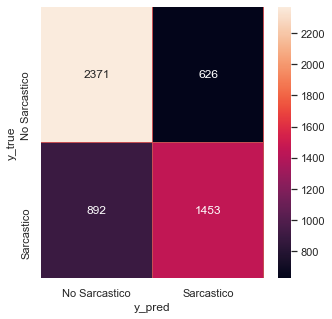

In [81]:
y_pred=rf.predict(xtest)
confusion(ytest,y_pred)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


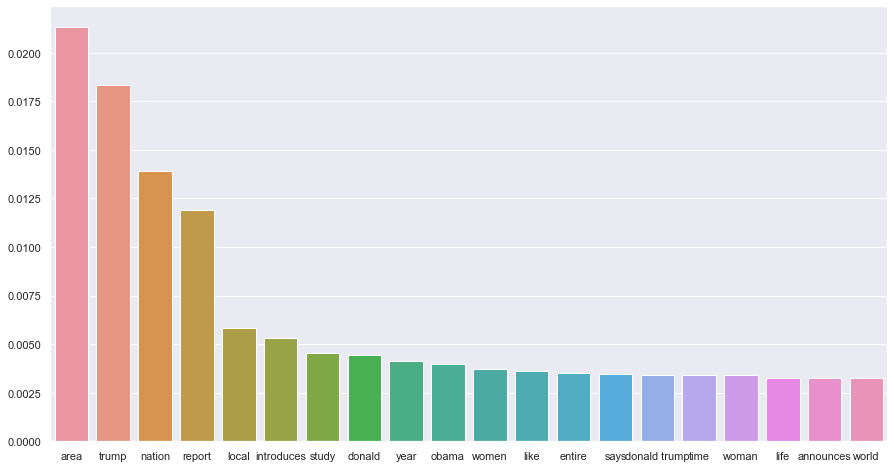

In [82]:
# We asked you the importance of each feature (each word)
importances = rf.feature_importances_
# Tomamos la lista de palabras
all_words = cou_vec.get_feature_names()
columns = all_words

# We order by importnacia and take the first 20
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

# Finally we graph
plt.figure(figsize = (15,8))
sns.barplot(selected_columns, selected_importances)
plt.show()

#### 4.3 SVM

In [83]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

0.729314863347061

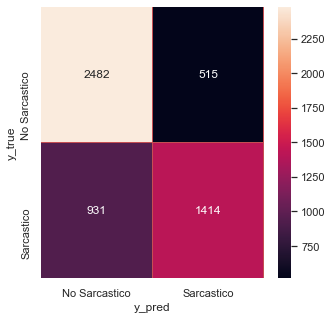

In [85]:
y_pred=svc.predict(xtest)
confusion(ytest,y_pred)